  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0    adviser     32/60   125   256   6000   256     16    128  198
1     amdahl    470v/7    29  8000  32000    32      8     32  269
2     amdahl   470v/7a    29  8000  32000    32      8     32  220
3     amdahl   470v/7b    29  8000  32000    32      8     32  172
4     amdahl   470v/7c    29  8000  16000    32      8     16  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 14.8+ KB
Non

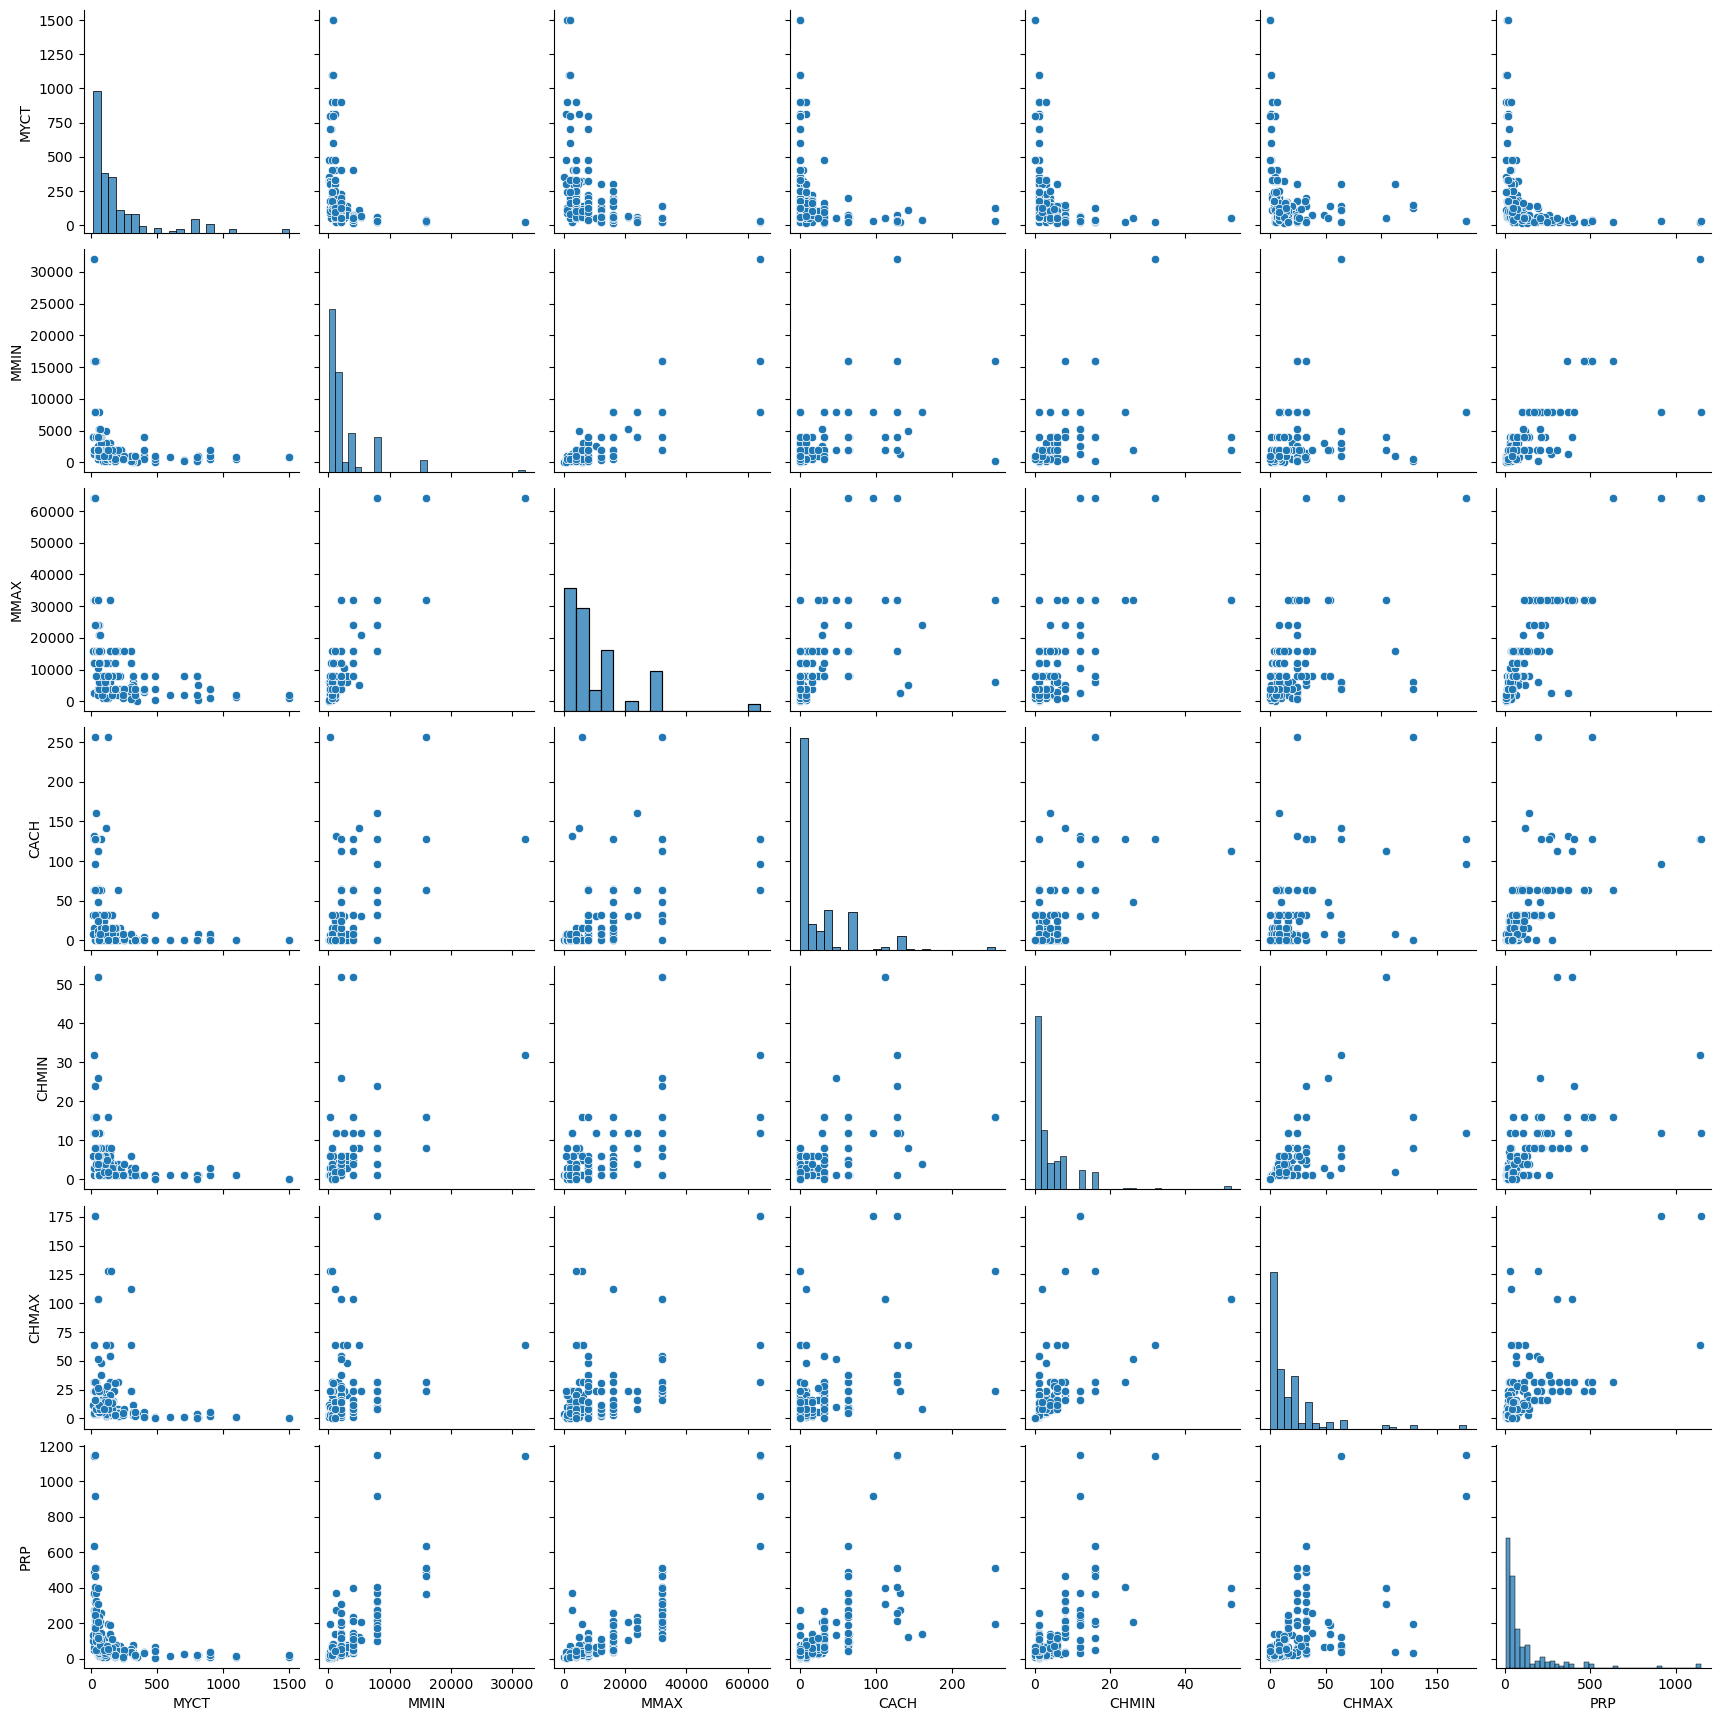

Train RMSE: 55.83600008444532
Test RMSE: 75.05376843166013
Train R-squared: 0.8378284557995717
Test R-squared: 0.8893455830696774
Cross-validation R-squared scores: [ 0.83594822 -0.09964463  0.86840964  0.84135651  0.63509917]
Mean CV R-squared: 0.6162337806164535


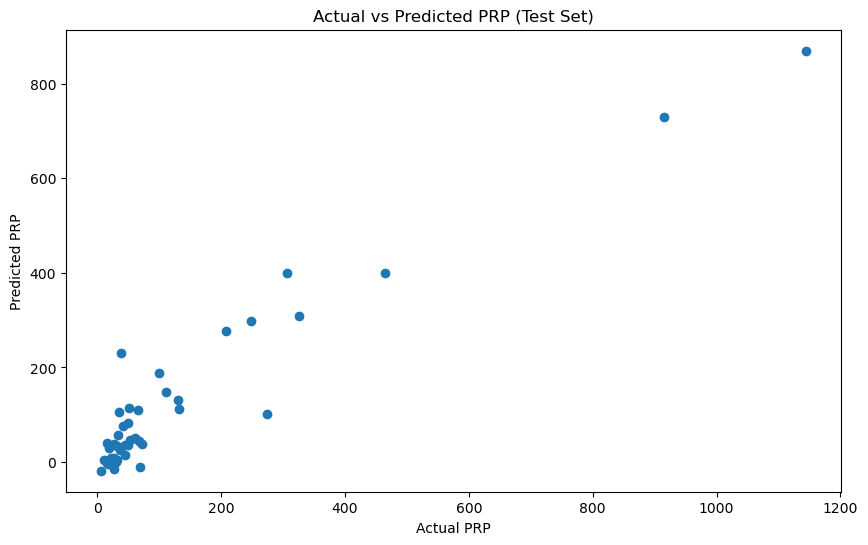

  Feature  Coefficient
0    MYCT     0.042756
1    MMIN     0.011096
2    MMAX     0.005968
3    CACH     0.621287
4   CHMIN     0.411682
5   CHMAX     1.382874


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 불러오기
df = pd.read_csv('machine.data.csv')

# 데이터 탐색
print(df.head())
print(df.info())
print(df.describe())

# 결측치 확인
print(df.isnull().sum())

# 데이터 시각화를 통한 이해
sns.pairplot(df)
plt.show()

# 특성과 타겟 변수 선택
# 예를 들어, 특성들 중에서 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX' 등을 선택하여 X로 설정하고,
# 'PRP' 변수를 타겟 변수 y로 설정할 수 있습니다.

X = df[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']]
y = df['PRP']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 훈련 데이터에서의 성능 평가
train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print(f'Train RMSE: {train_rmse}')

# 테스트 데이터에서의 성능 평가
test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print(f'Test RMSE: {test_rmse}')

# 결정 계수 (R-squared) 계산
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, test_pred)
print(f'Train R-squared: {r2_train}')
print(f'Test R-squared: {r2_test}')

# 교차 검증
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-validation R-squared scores: {cv_scores}')
print(f'Mean CV R-squared: {np.mean(cv_scores)}')

# 예측값과 실제값 비교 (테스트 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP (Test Set)')
plt.show()

# 모델 계수 확인
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 불러오기
df = pd.read_csv('machine.data.csv')

# 특성과 타겟 변수 선택
X = df[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']]
y = df['PRP']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 훈련 데이터에서의 성능 평가
train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

print("Training Set Performance:")
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'R-squared (R^2): {train_r2}')

# 테스트 데이터에서의 성능 평가
test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("\nTest Set Performance:")
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'R-squared (R^2): {test_r2}')

# 교차 검증 (Cross-validation)
cv_scores_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

# 부호를 바꾸어서 MSE, MAE로 변환
cv_scores_mse = -cv_scores_mse
cv_scores_mae = -cv_scores_mae

print("\nCross-validation Performance:")
print(f'Mean Squared Error (MSE): {np.mean(cv_scores_mse)}')
print(f'Mean Absolute Error (MAE): {np.mean(cv_scores_mae)}')
print(f'Mean R-squared (R^2): {np.mean(cv_scores_r2)}')


Training Set Performance:
Mean Squared Error (MSE): 3117.6589054301776
Mean Absolute Error (MAE): 35.12200634651684
R-squared (R^2): 0.8378284557995717

Test Set Performance:
Mean Squared Error (MSE): 5633.068155793262
Mean Absolute Error (MAE): 48.06880134700478
R-squared (R^2): 0.8893455830696774

Cross-validation Performance:
Mean Squared Error (MSE): 6383.656697342973
Mean Absolute Error (MAE): 43.37826225051737
Mean R-squared (R^2): 0.6162337806164535


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 불러오기
df = pd.read_csv('machine.data.csv')

# 새로운 특성 추가 (예시로 MMIN과 MMAX의 곱 추가)
df['COMBINED'] = df['MMIN'] * df['MMAX']

# 특성과 타겟 변수 선택
X = df[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'COMBINED']]
y = df['PRP']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge 회귀 모델 초기화
ridge_model = Ridge(alpha=0.1)  # alpha는 규제 강도를 조절하는 매개변수

# 모델 학습
ridge_model.fit(X_train, y_train)

# 훈련 데이터에서의 성능 평가
train_pred = ridge_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

print("Training Set Performance:")
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'R-squared (R^2): {train_r2}')

# 테스트 데이터에서의 성능 평가
test_pred = ridge_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("\nTest Set Performance:")
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'R-squared (R^2): {test_r2}')


Training Set Performance:
Mean Squared Error (MSE): 2593.4697583182633
Mean Absolute Error (MAE): 28.40518207764891
R-squared (R^2): 0.8650952498969571

Test Set Performance:
Mean Squared Error (MSE): 3900.066935483333
Mean Absolute Error (MAE): 37.46813023888904
R-squared (R^2): 0.9233881748277257
